In [1]:
import sys
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy import nan as NA
import matplotlib.pyplot as plt

In [26]:
import matplotlib.font_manager as fm

font_fname = 'C:/Windows/Fonts/NanumGothic.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()

print(font_family)

NameError: name 'font_manager' is not defined

# 중요!!!!!!!!!!!!!!!!!!!!!!
- Module2

    -Part 02. 빅데이터 전처리 및 시각화
    
        02. pandas

##### Series p.264

In [4]:
obj = Series([14, -27, 35, 73]) # 기본 색인은 인덱스 번호
print("Series\n{0}\nvalue\n{1}\nindex\n{2}".format(obj, obj.values, obj.index))

Series
0    14
1   -27
2    35
3    73
dtype: int64
value
[ 14 -27  35  73]
index
RangeIndex(start=0, stop=4, step=1)


In [6]:
obj = Series([14, -27, 35, 73], index = ["kim", "lee", "bae", "cho"]) # 색인은 index 인자로 입력
print("Series\n{0}\n\nvalue\n{1}\nindex\n{2}\n".format(obj, obj.values, obj.index))
obj["lee"] = 59 # 색인을 이용하여 자료에 접근
print("Series['lee', 'cho']\n{0}".format(obj[["lee","cho"]])) # 인덱스 접근은 괄호 2개 [[]]

Series
kim    14
lee   -27
bae    35
cho    73
dtype: int64

value
[ 14 -27  35  73]
index
Index(['kim', 'lee', 'bae', 'cho'], dtype='object')

Series['lee', 'cho']
lee    59
cho    73
dtype: int64


In [8]:
# Series 조건 추출
obj = Series([96, 73, 83, 97, 68, 72], index = ["kime", "lee", "bae", "cho", "jang", "kang"])
print("obj\n{0}\n".format(obj))
obj1 = obj[(obj>=60) & (obj<80)] + 10 # 인덱싱과 연산 후에도 Series 유지
print("obj1\n{0}\n\nexp(obj1)\n{1}".format(obj1, np.exp(obj1)))

obj
kime    96
lee     73
bae     83
cho     97
jang    68
kang    72
dtype: int64

obj1
lee     83
jang    78
kang    82
dtype: int64

exp(obj1)
lee     1.112864e+36
jang    7.498417e+33
kang    4.093997e+35
dtype: float64


In [9]:
# 사전을 Series 변환
dic = {"stat" : 270, "econ" : 150, "math" : 210, "comp" : 175}
obj2 = Series(dic, index = ["econ", "stat", "engi", "math"]) # index 인자를 추가하여 순서변경이나 색인 추가 가능
print("obj\n{0}\n".format(obj2))
# 기존에 없던 색인 "engi"는 추가되나 결측값 처리

obj
econ    150.0
stat    270.0
engi      NaN
math    210.0
dtype: float64



      -isnull(), notnull()로 결측값 여부 체크

In [10]:
obj1 = Series([95, 75, 85, 95], index = ["kim", "lee", "bae", "cho"])
obj2 = Series([65, 81, 73, 60, 91], index = ['lee', 'bae', 'jang', 'cho', 'kang'])
obj_sum = obj1 + obj2
print('obj_sum = obj1 + obj2\n{0}\n'.format(obj_sum))
obj_sum.name = 'Total Score' # Series 이름
obj_sum.index.name = 'choi' # 새로운 색인 추가(빈값)
print('obj_sum\n{0}'.format(obj_sum))
# 색인을 기준으로 연산

obj_sum = obj1 + obj2
bae     166.0
cho     155.0
jang      NaN
kang      NaN
kim       NaN
lee     140.0
dtype: float64

obj_sum
choi
bae     166.0
cho     155.0
jang      NaN
kang      NaN
kim       NaN
lee     140.0
Name: Total Score, dtype: float64


##### DataFrame p.268

In [17]:
data = {'mid':[30, 32, 28, 20, 19], 'hw':[10, 9, 7, 8, 10], 'fin':[29, 27, 31, 18, 21],
       'gender':['M', 'F', 'M', 'M', 'F']} # 사전
df = pd.DataFrame(data)
print('DataFrame\n{0}'.format(df))
df = DataFrame(data, columns = ['gender', 'hw', 'att', 'mid', 'fin'])
print("DataFrame\n{0}".format(df))
# columns = []를 통해 순서 지정가능 / 없는 열이름은 결측값 처리

DataFrame
   mid  hw  fin gender
0   30  10   29      M
1   32   9   27      F
2   28   7   31      M
3   20   8   18      M
4   19  10   21      F
DataFrame
  gender  hw  att  mid  fin
0      M  10  NaN   30   29
1      F   9  NaN   32   27
2      M   7  NaN   28   31
3      M   8  NaN   20   18
4      F  10  NaN   19   21


In [18]:
# 배열을 DataFrame으로 변환, 변수명 추가
arr = np.array([[10, 25, 32, 42], [85, 75, 96, 45], [68, 78, 94, 83]]) # 배열
print("배열\n{0}\n".format(arr))
df = DataFrame(arr) # 배열을 DataFrame으로 변경
print("DataFrame\n{0}\n".format(df))
df = DataFrame(arr, columns = ['V1', 'V2', 'V3', 'V4'], index = ['A', 'B', 'C'])
print("DataFrame\n{0}\n".format(df))

배열
[[10 25 32 42]
 [85 75 96 45]
 [68 78 94 83]]

DataFrame
    0   1   2   3
0  10  25  32  42
1  85  75  96  45
2  68  78  94  83

DataFrame
   V1  V2  V3  V4
A  10  25  32  42
B  85  75  96  45
C  68  78  94  83



    - DataFrame 색인 p.269
    - 행 추출 : loc[색인명], iloc[인덱스(n)], loc[[색인명]]
    - 열 추출 : df["변수명"] or df.변수명

In [21]:
data = {'mid':[30, 32, 28, 20, 19], 'hw':[10, 9, 7, 8, 10], 'fin':[29, 27, 31, 18, 21],
       'gender':['M', 'F', 'M', 'M', 'F']}
df = pd.DataFrame(data, index = [2017103, 2018212, 2017204, 2019137, 2018217])
print('DataFrame\n{0}\n'.format(df))
print("행 색인 2017204\n{0}\n".format(df.ix[2017204])) # 이건 곧 사라짐
print("행 색인 2017204\n{0}\n".format(df.loc[2017204])) # 어차피 결과값 같으니 이걸 사용
print("행 인덱스 2\n{0}".format(df.iloc[2]))
# loc[인덱스명]
# iloc[n]

DataFrame
         mid  hw  fin gender
2017103   30  10   29      M
2018212   32   9   27      F
2017204   28   7   31      M
2019137   20   8   18      M
2018217   19  10   21      F

행 색인 2017204
mid       28
hw         7
fin       31
gender     M
Name: 2017204, dtype: object

행 색인 2017204
mid       28
hw         7
fin       31
gender     M
Name: 2017204, dtype: object

행 인덱스 2
mid       28
hw         7
fin       31
gender     M
Name: 2017204, dtype: object


C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [24]:
print("행 색인 2017204\n{0}\n".format(df.loc[[2017204, 2017103]]))
# 여러개 추출할 시 대괄호 2개 사용하기 [[]]
print("열 색인 [gender]\n{0}".format(df[['gender','mid']])) # or df.gender 사용

행 색인 2017204
         mid  hw  fin gender
2017204   28   7   31      M
2017103   30  10   29      M

열 색인 [gender]
        gender  mid
2017103      M   30
2018212      F   32
2017204      M   28
2019137      M   20
2018217      F   19


In [28]:
val = Series([10, 9, 8, 7], index = [1, 3, 0, 5])
df = DataFrame(data)
df['att'] = val # DataFrame에 Series를 추가할 때 색인을 기준으로 추가
print("DataFrame\n{0}\n".format(df))
print("DataFrame 전치\n{0}\n".format(df.T))
print("mid, att열의 행 색인 [0,1,3]\n{0}".format(df.iloc[[1, 3, 0]][['mid', 'att']]))

DataFrame
   mid  hw  fin gender   att
0   30  10   29      M   8.0
1   32   9   27      F  10.0
2   28   7   31      M   NaN
3   20   8   18      M   9.0
4   19  10   21      F   NaN

DataFrame 전치
         0   1    2   3    4
mid     30  32   28  20   19
hw      10   9    7   8   10
fin     29  27   31  18   21
gender   M   F    M   M    F
att      8  10  NaN   9  NaN

mid, att열의 행 색인 [0,1,3]
   mid   att
1   32  10.0
3   20   9.0
0   30   8.0


    - 재색인 reindex() p.273
    - mothod(행만 가능) = 'ffill', 'pad' -> 앞의 값 채우기 (sort된 인덱스의 순서에서 앞의 값)
                       / 'bfill', 'packfill' -> 뒤의 값 채우기(행만 가능)
    - 또는 fill_value = 숫자 (행, 열 둘다 가능)
    - 행 색인만 가능

In [29]:
obj = Series([2.5, 6.4, 7.8, 6.5,], index = ['kim', 'cho', 'bae', 'lee'])
print('obj\n{0}\n'.format(obj))
obj2 = obj.reindex(['bae', 'cho', 'choi', 'kim', 'lee'], fill_value = 0) #채우기 값 0
print('obj\n{0}\n'.format(obj2))
obj3 = obj2.reindex(['bae', 'cho', 'choi', 'kang', 'kim', 'lee'], method = 'bfill')
print('obj3\n{0}'.format(obj3))

obj
kim    2.5
cho    6.4
bae    7.8
lee    6.5
dtype: float64

obj
bae     7.8
cho     6.4
choi    0.0
kim     2.5
lee     6.5
dtype: float64

obj3
bae     7.8
cho     6.4
choi    0.0
kang    2.5
kim     2.5
lee     6.5
dtype: float64


In [32]:
data = {'mid':[30, 32, 28, 20, 19], 'hw':[10, 9, 7, 8, 10], 'fin':[29, 27, 31, 18, 21],
       'gender':['M', 'F', 'M', 'M', 'F']}
df = pd.DataFrame(data, index = [2017103, 2017204, 2018212, 2018217, 2019137])
print('df\n{0}\n'.format(df))
df1 = df.reindex([2017103, 2017204, 2018212, 2018217, 2019108, 2019137], fill_value = 0)
print('df1\n{0}'.format(df1))
df2 = df.reindex([2017103, 2017204, 2018212, 2018217, 2019108, 2019137],
                columns = ['att', 'gender', 'hw', 'fin', 'mid'], fill_value = 0)
print('df2\n{0}\n'.format(df2))
df3 = df.reindex([2017103, 2017204, 2018212, 2018217, 2019108, 2019137],method = 'ffill')
print('df3\n{0}'.format(df3))

df
         mid  hw  fin gender
2017103   30  10   29      M
2017204   32   9   27      F
2018212   28   7   31      M
2018217   20   8   18      M
2019137   19  10   21      F

df1
         mid  hw  fin gender
2017103   30  10   29      M
2017204   32   9   27      F
2018212   28   7   31      M
2018217   20   8   18      M
2019108    0   0    0      0
2019137   19  10   21      F
df2
         att gender  hw  fin  mid
2017103    0      M  10   29   30
2017204    0      F   9   27   32
2018212    0      M   7   31   28
2018217    0      M   8   18   20
2019108    0      0   0    0    0
2019137    0      F  10   21   19

df3
         mid  hw  fin gender
2017103   30  10   29      M
2017204   32   9   27      F
2018212   28   7   31      M
2018217   20   8   18      M
2019108   20   8   18      M
2019137   19  10   21      F


    - drop()메소드 : axis 옵션을 통해 행 또는 열 일부 제거 (디폴트 = 행)

In [39]:
data = {'gender':['M', 'F', 'M', 'M', 'F'], 'att':[9, 10, 10, 7, 8], 'hw':[10, 9, 7, 8, 10],
       'mid':[30, 32, 28, 20, 19], 'fin':[29, 27, 31, 18, 21]}
df = DataFrame(data, index = [2017103, 2017204, 2018212, 2018217, 2019137])
df1 = df.drop(2018212) # 행 삭제
df2 = df.drop(['att', 'hw'], axis = 1) # 열 삭제
# 행렬과 DataFrame은 axis 0, 1이 서로 반대
print('df\n{0}\n\ndf1\n{1}\n\ndf2\n{2}'.format(df, df1, df2))

df
        gender  att  hw  mid  fin
2017103      M    9  10   30   29
2017204      F   10   9   32   27
2018212      M   10   7   28   31
2018217      M    7   8   20   18
2019137      F    8  10   19   21

df1
        gender  att  hw  mid  fin
2017103      M    9  10   30   29
2017204      F   10   9   32   27
2018217      M    7   8   20   18
2019137      F    8  10   19   21

df2
        gender  mid  fin
2017103      M   30   29
2017204      F   32   27
2018212      M   28   31
2018217      M   20   18
2019137      F   19   21


    - 색인하기, 선택하기, 자르기
    - 인덱스 선택시에는 대괄호 2개 [[]] / 슬라이싱 시에는 대괄호 1개 []

In [49]:
obj = Series([2.5, 6.4, 7.8, 6.5, 8.5, 5.6], index = ['a', 'b', 'e', 'c', 'f', 'd'])
print('[[0,2]]\n{0}\n\n[2:5]\n{1}'.format(obj[[0,2]], obj[2:5]))
print("[['a','e']]\n{0}\n\n['e':'f']\n{1}\n".format(obj[['a', 'e']], obj['e':'f']))
# 인덱스 선택시에는 대괄호 2개 [[]] / 슬라이싱 시에는 대괄호 1개 []
print("6이상의 값만 선택\n{0}\n".format(obj[obj>=6]))
obj[obj>=6] = float("NaN") # 6이상의 자료를 NaN
print("6이상의 값 NaN으로 변경\n{0}".format(obj))

[[0,2]]
a    2.5
e    7.8
dtype: float64

[2:5]
e    7.8
c    6.5
f    8.5
dtype: float64
[['a','e']]
a    2.5
e    7.8
dtype: float64

['e':'f']
e    7.8
c    6.5
f    8.5
dtype: float64

6이상의 값만 선택
b    6.4
e    7.8
c    6.5
f    8.5
dtype: float64

6이상의 값 NaN으로 변경
a    2.5
b    NaN
e    NaN
c    NaN
f    NaN
d    5.6
dtype: float64


In [106]:
x = np.random.rand(100)
gender = np.where(x>0.5, "M", "F")
height = np.random.normal(loc = 175, scale = 6, size = 100)
weight = np.random.normal(loc = 68, scale = 3, size = 100)
DF = DataFrame({"gender" : gender, "height" : height, "weight" : weight})
# DF = DataFrame(np.array([gender, height, weight]).T, columns=["gender", "height", "weight"])
# array로 하면 데이터가 str으로 처리됨
DF

,gender,height,weight
0,M,179.884953,68.086526
1,F,177.336024,73.974922
2,F,172.466535,64.857649
3,M,181.197575,69.430763
4,F,171.861083,71.137648
5,M,170.710363,71.712128
6,M,165.475344,72.550408
7,M,169.258562,68.149018
8,F,165.332423,70.355839
9,M,167.019815,66.228765


    - 난수 생성후 train set, test set 나누기

In [73]:
np.random.seed(12298)
rand_num = np.random.rand(100)
select = rand_num < 0.9
select, np.sum(select)

(array([False,  True,  True,  True,  True, False,  True, False,  True,
         True,  True,  True,  True,  True, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True, False,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True, False,  True,  True,  True,  True,  True,  True,  True,
        False,  True,  True,  True,  True,  True,  True,  True, False,
         True,  True, False,  True,  True,  True,  True,  True, False,
         True,  True,  True,  True,  True,  True, False,  True,  True,
        False,  True,  True, False, False,  True,  True,  True,  True,
         True]), 85)

In [107]:
trainDF = DF[select]
testDF = DF[~select]
trainDF, testDF

(   gender      height     weight
 1       F  177.336024  73.974922
 2       F  172.466535  64.857649
 3       M  181.197575  69.430763
 4       F  171.861083  71.137648
 6       M  165.475344  72.550408
 8       F  165.332423  70.355839
 9       M  167.019815  66.228765
 10      F  182.700104  63.956366
 11      F  178.321956  66.905812
 12      F  167.744721  70.295794
 13      M  181.077187  72.074574
 15      M  174.508258  73.469556
 16      M  172.483406  66.872973
 17      M  179.786752  67.797715
 18      M  177.474859  67.902297
 19      M  181.945893  64.656137
 20      F  167.622165  66.257799
 21      M  177.560591  62.864120
 22      F  179.424048  67.761983
 23      F  180.114118  66.493844
 24      M  177.837736  65.234843
 25      F  179.292791  66.357153
 26      M  168.287796  64.821961
 27      M  173.585386  65.496454
 28      M  175.463589  73.922354
 29      M  168.354332  72.486737
 30      F  178.956238  61.460417
 31      M  173.968970  69.591167
 32      M  18

In [108]:
DF.dtypes

gender     object
height    float64
weight    float64
dtype: object

In [109]:
NewData = DF[(DF.gender == 'M') &(DF.height >= 180)]
NewData

,gender,height,weight
3,M,181.197575,69.430763
13,M,181.077187,72.074574
19,M,181.945893,64.656137
32,M,182.153345,62.420733
47,M,189.718406,68.493925
73,M,182.762819,71.195410


    - DataFrame type확인 : df.dtypes
    - DataFrame type변환 : df['변수'].astype('float')
    - 아니면 주로 이걸 씀 : pd.to_numeric(df['변수'], errors = 'ignore', 'coerce')

    - 산술연산, 데이터 정렬( series 연산, dataframe 연산 )

In [115]:
Ex1 = Series(np.random.binomial(n = 100, p = 0.6, size = 6), index = ['A', 'B', 'D', 'E', 'F', 'H'])
Ex2 = Series(np.random.binomial(n = 50, p = 0.4, size = 6), index = ['B', 'C', 'A', 'D', 'F', 'E'])
print(Ex1,"\n",Ex2,"\n",Ex1 + Ex2)
# 한쪽이라도 해당 인덱스가 없으면 결측값(NaN) 처리됨
print(Ex1,"\n",Ex2,"\n",Ex1 + Ex2,"\n", Ex1.add(Ex2, fill_value=0))
# 수식이 아닌 연산 메소드를 이용함으로써 결측값을 채울 수가 있음

A    63
B    62
D    56
E    59
F    62
H    58
dtype: int32 
 B    19
C    17
A    21
D    19
F    20
E    19
dtype: int32 
 A    84.0
B    81.0
C     NaN
D    75.0
E    78.0
F    82.0
H     NaN
dtype: float64
A    63
B    62
D    56
E    59
F    62
H    58
dtype: int32 
 B    19
C    17
A    21
D    19
F    20
E    19
dtype: int32 
 A    84.0
B    81.0
C     NaN
D    75.0
E    78.0
F    82.0
H     NaN
dtype: float64 
 A    84.0
B    81.0
C    17.0
D    75.0
E    78.0
F    82.0
H    58.0
dtype: float64


In [117]:
data1 = {"att":[3, 4, 1], "mid":[15, 10, 12], "fin":[12, 15, 9]}
data2 = {"att":[2,5,3,2,1], "hw":[10,7,6,4,2],
        "mid":[15,12,9,10,7], "fin":[12,10,13,15,9]}
df1 = DataFrame(data1, index = ["st1", "st2", "st4"])
df2 = DataFrame(data2, index = ["st1", "st2", "st3", "st4", "st5"])

print("df1 + df2\n{0}\n".format(df1+df2))
print("df1.add(df2)\n{0}".format(df1.add(df2, level=1, fill_value = 0)))

df1 + df2
     att   fin  hw   mid
st1  5.0  24.0 NaN  30.0
st2  9.0  25.0 NaN  22.0
st3  NaN   NaN NaN   NaN
st4  3.0  24.0 NaN  22.0
st5  NaN   NaN NaN   NaN

df1.add(df2)
     att   fin    hw   mid
st1  5.0  24.0  10.0  30.0
st2  9.0  25.0   7.0  22.0
st3  3.0  13.0   6.0   9.0
st4  3.0  24.0   4.0  22.0
st5  1.0   9.0   2.0   7.0


In [122]:
s1 = Series([5,3,10], index = ["att", "hw", "etc"])
s2 = Series([5,3,10], index = ["st1", "st4", "st2"])
data1 = {"att":[3,4,1,2], "hw":[5,3,4,1], "mid":[15,10,12,16], "fin":[12,15,9,10]}
df = DataFrame(data1, index = ["st1", "st2", "st3", "st4"])
print("Series 1\n{0}\n\nSeries 2\n{1}\n\nDataFrame\n{2}".format(s1,s2,df))
print("df+s\n{0}".format(df+s1)) # 시리즈에 있는 인덱스의 원소값들에 다 더해줌
print("df+s\n{0}".format(df.add(s1))) # df.add()의 디폴트는 열 연산
print("df+s\n{0}".format(df.add(s2, axis = 0))) # df.add()의 axis를 행으로 바꾸어 연산

Series 1
att     5
hw      3
etc    10
dtype: int64

Series 2
st1     5
st4     3
st2    10
dtype: int64

DataFrame
     att  hw  mid  fin
st1    3   5   15   12
st2    4   3   10   15
st3    1   4   12    9
st4    2   1   16   10
df+s
     att  etc  fin   hw  mid
st1  8.0  NaN  NaN  8.0  NaN
st2  9.0  NaN  NaN  6.0  NaN
st3  6.0  NaN  NaN  7.0  NaN
st4  7.0  NaN  NaN  4.0  NaN
df+s
     att  etc  fin   hw  mid
st1  8.0  NaN  NaN  8.0  NaN
st2  9.0  NaN  NaN  6.0  NaN
st3  6.0  NaN  NaN  7.0  NaN
st4  7.0  NaN  NaN  4.0  NaN
df+s
      att    hw   mid   fin
st1   8.0  10.0  20.0  17.0
st2  14.0  13.0  20.0  25.0
st3   NaN   NaN   NaN   NaN
st4   5.0   4.0  19.0  13.0


    - 함수 적용, 매핑

In [126]:
s1 = Series([2.5, 7.6, 9.1], index = ["case1", "case2", "case3"])
s2 = Series([3.1, 2.8, 7.5], index = ["case1", "case2", "case3"])
data = {"att":[3,4,1,2], "hw":[5,3,4,1], "mid":[15,10,12,16], "fin":[12,15,9,10]}
df = DataFrame(data, index = ["st1", "st2", "st3", "st4"])
print("Series 1\n{0}\n\nSeries 2\n{1}\n\nDataFrame\n{2}\n".format(s1, s2, df))
print("df+s\n{0}\n\ndf+s\n{1}\n".format(np.exp(s1), np.minimum(s1, s2)))
# np의 메소드를 쓰려면 size가 같아야함
print("df+n\n{0}".format(np.log(df)))

Series 1
case1    2.5
case2    7.6
case3    9.1
dtype: float64

Series 2
case1    3.1
case2    2.8
case3    7.5
dtype: float64

DataFrame
     att  hw  mid  fin
st1    3   5   15   12
st2    4   3   10   15
st3    1   4   12    9
st4    2   1   16   10

df+s
case1      12.182494
case2    1998.195895
case3    8955.292703
dtype: float64

df+s
case1    2.5
case2    2.8
case3    7.5
dtype: float64

df+n
          att        hw       mid       fin
st1  1.098612  1.609438  2.708050  2.484907
st2  1.386294  1.098612  2.302585  2.708050
st3  0.000000  1.386294  2.484907  2.197225
st4  0.693147  0.000000  2.772589  2.302585


In [132]:
f = lambda x: x.max()-x.min()
print("apply 메소드 각 열별 연산\n{0}\n".format(df.apply(f)))
print("apply 메소드 각 행별 연산\n{0}".format(df.apply(f, axis = 1)))
# apply 함수의 디폴트는 axis = 0 으로써 열 연산

# print(Df, "\n", Df.apply(np.sum(), axis = 1))

apply 메소드 각 열별 연산
att    3
hw     4
mid    6
fin    6
dtype: int64

apply 메소드 각 행별 연산
st1    12
st2    12
st3    11
st4    15
dtype: int64


In [134]:
def f(x) :
    return Series([x.min(), x.max(), x.max()-x.min()], index = ["최소", "최대", "범위"])
print("apply 메소드 각 열별 연산\n{0}\n".format(df.apply(f)))

def g(x) : # factorial 계싼식
    fa = 1
    for i in range(1, (x+1)) :
        fa *= i
    return fa
print("applymap 메소드 각 원소별 연산\n{0}".format(df.applymap(g)))
# applymap()은 각 원소별 함수 적용
# np.exp(df) = df.applymap(df) 이다.
# 그러나 applymap을 사용하는 이유는 np.exp가 아닌 없는 새로운 함수 또는 메소드를 적용하고자 할때 사용

apply 메소드 각 열별 연산
    att  hw  mid  fin
최소    1   1   10    9
최대    4   5   16   15
범위    3   4    6    6

applymap 메소드 각 원소별 연산
     att   hw             mid            fin
st1    6  120   1307674368000      479001600
st2   24    6         3628800  1307674368000
st3    1   24       479001600         362880
st4    2    1  20922789888000        3628800


    - 정렬과 순위
    - sort_index() -> axis를 통해 행 또는 열 선택
    - sort_values() -> by를 옵션으로 정렬 기준 변수 선택
    - rank() -> ascending = True,False / method(동률 처리) = average,min,max,first
                axis를 통해 행 또는 열 선택 가능

In [141]:
s = Series([ 2.5, np.inf, 3.1, np.nan, 7.5], index = ["case5", "case3", "case2", "case3", "case1"])
data = {"att":[3,4,1,2], "hw":[5,3,4,1], "mid":[15,10,12,16], "fin":[15,10,9,10]}
df = DataFrame(data, index = ["st3", "st2", "st4", "st1"])
print("Series\n{0}\n\nDataFrame\n{1}\n".format(s,df))

print("Series 색인 정렬\n{0}\n".format(s.sort_index(ascending = False)))
print("Series 값 정렬\n{0}\n".format(s.sort_values()))
print("Series 값 정렬\n{0}\n".format(s.sort_values(ascending = False)))
# NaN(결측값)은 무조건 맨 밑으로 감)
print("DataFrame 행 색인 정렬\n{0}\n".format(df.sort_index(ascending = False)))
print("DataFrame 열 색인 정렬\n{0}\n".format(df.sort_index(axis = 1)))

print("DataFrame fin 값 기준 정렬\n{0}\n".format(df.sort_values(by = "fin")))
print("DataFrame fin, mid 값 기준 정렬\n{0}".format(df.sort_values(by = ["fin", "mid"])))

Series
case5    2.5
case3    inf
case2    3.1
case3    NaN
case1    7.5
dtype: float64

DataFrame
     att  hw  mid  fin
st3    3   5   15   15
st2    4   3   10   10
st4    1   4   12    9
st1    2   1   16   10

Series 색인 정렬
case5    2.5
case3    inf
case3    NaN
case2    3.1
case1    7.5
dtype: float64

Series 값 정렬
case5    2.5
case2    3.1
case1    7.5
case3    inf
case3    NaN
dtype: float64

Series 값 정렬
case3    inf
case1    7.5
case2    3.1
case5    2.5
case3    NaN
dtype: float64

DataFrame 행 색인 정렬
     att  hw  mid  fin
st4    1   4   12    9
st3    3   5   15   15
st2    4   3   10   10
st1    2   1   16   10

DataFrame 열 색인 정렬
     att  fin  hw  mid
st3    3   15   5   15
st2    4   10   3   10
st4    1    9   4   12
st1    2   10   1   16

DataFrame fin 값 기준 정렬
     att  hw  mid  fin
st4    1   4   12    9
st2    4   3   10   10
st1    2   1   16   10
st3    3   5   15   15

DataFrame fin, mid 값 기준 정렬
     att  hw  mid  fin
st4    1   4   12    9
st2    4   3   10   10
st1 

In [142]:
print("Series 순위\n{0}\n".format(s.rank(ascending = False)))
# Series는 index에 rank가 적용
print("DataFrame 열별 순위 \n{0}\n".format(df.rank(method = "max")))
# max가 등수 낮은걸로 표시, min이 등수 높은걸로 표시
print("DataFrame 행별 순위 \n{0}".format(df.rank(axis = 1, method = "average")))

Series 순위
case5    4.0
case3    1.0
case2    3.0
case3    NaN
case1    2.0
dtype: float64

DataFrame 열별 순위 
     att   hw  mid  fin
st3  3.0  4.0  3.0  4.0
st2  4.0  2.0  1.0  3.0
st4  1.0  3.0  2.0  1.0
st1  2.0  1.0  4.0  3.0

DataFrame 행별 순위 
     att   hw  mid  fin
st3  1.0  2.0  3.5  3.5
st2  2.0  1.0  3.5  3.5
st4  1.0  2.0  4.0  3.0
st1  2.0  1.0  4.0  3.0


    - 중복색인
    - index.is_unique

In [145]:
s = Series([ 2.5, np.inf, 3.1, np.nan, 7.5], index = ["case2", "case4", "case2", "case3", "case1"])
data = {"att":[3,4,1,2], "hw":[5,3,4,1], "mid":[15,10,12,16], "fin":[15,10,9,10]}
df = DataFrame(data, index = ["st3", "st1", "st2", "st1"])
print("Series\n{0}\n\nDataFrame\n{1}\n".format(s, df))

print("Series 같은 색인 \n{0}\n".format(s.index.is_unique))
print("Series 색인 case2\n{0}\n".format(s["case2"]))
print("DataFrame 같은 색인\n{0}\n".format(df.index.is_unique))
print("DataFrame 색인 st1\n{0}".format(df.loc["st1"]))

Series
case2    2.5
case4    inf
case2    3.1
case3    NaN
case1    7.5
dtype: float64

DataFrame
     att  hw  mid  fin
st3    3   5   15   15
st1    4   3   10   10
st2    1   4   12    9
st1    2   1   16   10

Series 같은 색인 
False

Series 색인 case2
case2    2.5
case2    3.1
dtype: float64

DataFrame 같은 색인
False

DataFrame 색인 st1
     att  hw  mid  fin
st1    4   3   10   10
st1    2   1   16   10


##### 기술통계 메소드 p.288

    - count() : NA를 제외한 값의 개수
    - describe() : 요약통계
    - min(), max()
    - argmin(), argmax() : 최소값과 최대값이 있는 색인 index(정수) 반환
    - idxmin(), idxmax() : 최소값과 최대값이 있는 색인 반환
    - quantile() : 옵션 ( q = [0.1, 0.5] )
    - sum() : 행별 합계(axis = 1), 열별 합계(axis = 0)
    - mean()
    - median()
    - mad() : 절대 평균편차
    - var()
    - std()
    - skew() : 비대칭도 왜도
    - kurt() : 첨도
    - cumsum()
    - cummin(), cummax() : 누적 최소값, 누적 최대값
    - cumprod() : 누적곱
    - diff : 1차 차분
    - pct_change() : 퍼센트 변화율
$${x_{i+1} - x_i} \over {x_i}$$
    - 공통 옵션 : axis, skipna(디폴트:True), level(계산하는 축이 계층적 색인이면 레벨에 따라 계산

In [147]:
# 바로 위에 s와 df 실행 돌리기
print("Series 평균(결측제외) : {0}\n".format(s.mean()))
print("Series 평균(결측포함) : {0}\n".format(s.mean(skipna = False)))
print("DataFrame 열별 평균(결측제외)\n{0}\n".format(df.mean()))
print("DataFrame 열별 평균(결측포함)\n{0}".format(df.mean(skipna = False)))
print("DataFrame 행별 합계(결측제외)\n{0}\n".format(df.sum(axis = 1)))
print("DataFrame 열별 분위수(결측제외)\n{0}".format(df.quantile(q = [0.1, 0.5])))

Series 평균(결측제외) : inf

Series 평균(결측포함) : nan

DataFrame 열별 평균(결측제외)
att     2.50
hw      3.25
mid    13.25
fin    11.00
dtype: float64

DataFrame 열별 평균(결측포함)
att     2.50
hw      3.25
mid    13.25
fin    11.00
dtype: float64
DataFrame 행별 합계(결측제외)
st3    38
st1    27
st2    26
st1    29
dtype: int64

DataFrame 열별 분위수(결측제외)
     att   hw   mid   fin
0.1  1.3  1.6  10.6   9.3
0.5  2.5  3.5  13.5  10.0


In [149]:
print("DataFrame 열별 기술통계(결측제외)\n{0}\n".format(df.describe()))

s = Series(["A", "B", "A", "C", "B", "B", np.nan], 
          index = ["case1", "case2", "case3", "case4", "case5", "case6", "case7"])
print("DataFrame 열별 기술통계(결측제외)\n{0}".format(s.describe()))

DataFrame 열별 기술통계(결측제외)
            att        hw        mid        fin
count  4.000000  4.000000   4.000000   4.000000
mean   2.500000  3.250000  13.250000  11.000000
std    1.290994  1.707825   2.753785   2.708013
min    1.000000  1.000000  10.000000   9.000000
25%    1.750000  2.500000  11.500000   9.750000
50%    2.500000  3.500000  13.500000  10.000000
75%    3.250000  4.250000  15.250000  11.250000
max    4.000000  5.000000  16.000000  15.000000

DataFrame 열별 기술통계(결측제외)
count     6
unique    3
top       B
freq      3
dtype: object


##### 공분산과 상관계수 p.291

    - cov() : 공분산 행렬
    - corr() : 전체
    - corrwith() : 특정 변수와 다른 변수들 간

In [3]:
steel_data = np.loadtxt("C:/Users/Affinity/Desktop/study/Python_Data/ch02_data/steel.txt", 
                       skiprows = 5, delimiter = "\t")
df = DataFrame(steel_data, columns = ["y", "x1", "x2"])
print("DataFrame\n{0}\n".format(df))

DataFrame
       y     x1    x2
0   81.4  195.0  57.0
1  122.2  179.0  61.0
2  101.7  205.0  60.0
3  175.6  204.0  62.0
4  150.3  201.0  61.0
5   64.8  184.0  54.0
6   92.1  210.0  58.0
7  113.8  209.0  61.0



In [4]:
print("x1과 y의 공분산\n{0}\n".format(df.x1.cov(df.y)))
print("공분산행렬\n{0}".format(df.cov()))
print("x1과 y의 상관계수\n{0}\n".format(df.x1.corr(df.y)))
print("상관계수행렬\n{0}\n".format(df.corr()))
print("y와 x1, x2의 상관계수행렬\n{0}".format(df.corrwith(df.y)))

x1과 y의 공분산
108.85535714285713

공분산행렬
              y          x1         x2
y   1325.868393  108.855357  85.246429
x1   108.855357  131.982143  11.178571
x2    85.246429   11.178571   7.357143
x1과 y의 상관계수
0.2602208017100887

상관계수행렬
           y        x1        x2
y   1.000000  0.260221  0.863120
x1  0.260221  1.000000  0.358735
x2  0.863120  0.358735  1.000000

y와 x1, x2의 상관계수행렬
y     1.000000
x1    0.260221
x2    0.863120
dtype: float64


    - 유일 값, 값 세기, 값 있는지 확인(unique, isin, value_counts)

In [9]:
s = Series([22, 13 ,14, 22, 14, 11, 14])
print("Series\n{0}\n".format(s))
print("Series 유일값\n{0}\n".format(s.unique()))
print("Series 유일값 빈도\n{0}\n".format(s.value_counts()))
print("Series [10, 14] 존재 여부\n{0}".format(s.isin([10, 14])))

Series
0    22
1    13
2    14
3    22
4    14
5    11
6    14
dtype: int64

Series 유일값
[22 13 14 11]

Series 유일값 빈도
14    3
22    2
13    1
11    1
dtype: int64

Series [10, 14] 존재 여부
0    False
1    False
2     True
3    False
4     True
5    False
6     True
dtype: bool


In [10]:
data = {"att" : [10, 9, 10, 10, 8], "hw" : [10, 8, 10, 10, 9], "mid" : [25, 29, 25, 27, 30],
       "fin" : [29, 35, 28, 35, 27]}
df = DataFrame(data, index = ["st1", "st2", "st3", "st4", "st5"])
print("DataFrame\n{0}\n".format(df))
print("열 att 유일값\n{0}\n".format(df.att.unique()))
print("열 att 유일값 빈도\n{0}\n".format(df.att.value_counts()))
print("각 열별 유일값 빈도\n{0}\n".format(df.apply(pd.value_counts)))
# dataframe 전체 데이터 빈도 확인 apply적용
print("각 열별 유일값 빈도\n{0}".format(df.apply(pd.value_counts).fillna(0)))

DataFrame
     att  hw  mid  fin
st1   10  10   25   29
st2    9   8   29   35
st3   10  10   25   28
st4   10  10   27   35
st5    8   9   30   27

열 att 유일값
[10  9  8]

열 att 유일값 빈도
10    3
9     1
8     1
Name: att, dtype: int64

각 열별 유일값 빈도
    att   hw  mid  fin
8   1.0  1.0  NaN  NaN
9   1.0  1.0  NaN  NaN
10  3.0  3.0  NaN  NaN
25  NaN  NaN  2.0  NaN
27  NaN  NaN  1.0  1.0
28  NaN  NaN  NaN  1.0
29  NaN  NaN  1.0  1.0
30  NaN  NaN  1.0  NaN
35  NaN  NaN  NaN  2.0

각 열별 유일값 빈도
    att   hw  mid  fin
8   1.0  1.0  0.0  0.0
9   1.0  1.0  0.0  0.0
10  3.0  3.0  0.0  0.0
25  0.0  0.0  2.0  0.0
27  0.0  0.0  1.0  1.0
28  0.0  0.0  0.0  1.0
29  0.0  0.0  1.0  1.0
30  0.0  0.0  1.0  0.0
35  0.0  0.0  0.0  2.0


    - 누락된 데이터 처리(결측값 처리, NA, NaN)

In [14]:
s = Series(["kim", np.nan, "lee", None, "cho", "bae"])
print("Series\n{0}\n".format(s))
print("Series\n{0}\n".format(s.isnull()))

Series
0     kim
1     NaN
2     lee
3    None
4     cho
5     bae
dtype: object

Series
0    False
1     True
2    False
3     True
4    False
5    False
dtype: bool



In [15]:
s = Series([7.5, 9.7, 10, NA, 5.4, NA, None])
print("Series\n{0}\n\nNA 제거\n{1}".format(s, s.dropna()))

Series
0     7.5
1     9.7
2    10.0
3     NaN
4     5.4
5     NaN
6     NaN
dtype: float64

NA 제거
0     7.5
1     9.7
2    10.0
4     5.4
dtype: float64


In [26]:
gender = Series(["남", "남", "여", "남", "여"])
s = Series([10, 20, 30, 40, 50])
s[gender.isin(["남"])]
# s[gender == "남"] -> 이 경우 조건이 하나라 간편, 빠름 / 그러나 조건 여려개이면 길어짐

0    10
1    20
3    40
dtype: int64

    - dropna() 메소드 (옵션)
    - how = "all" 옵션을 적용하면 모든 열이 누락된 값인 행 삭제
    - 몇 개 이상의 값이 들어 있는 행만 선택하려면 thresh 옵션으로 지정
    - 행이 아닌 열을 삭제 하기 위해서 axis = 1 옵션을 적용

In [17]:
data = {"att" : [10, 9, NA, 10, 8], "hw" : [10, 8, NA, NA, 9], "mid" : [NA, 29, NA, 27, 30],
       "fin" : [29, 35, NA, 35, 27]}
df = DataFrame(data, index = ["st1", "st2", "st3", "st4", "st5"])
print("DataFrame\n{0}\n\nNA가 있는 행 제거\n{1}\n".format(df, df.dropna()))
print("모든 열이 NA인 행 제거\n{0}\n".format(df.dropna(how = "all")))
print("값이 4개 이상 입력된 열\n{0}".format(df.dropna(axis = 1, thresh = 4)))

DataFrame
      att    hw   mid   fin
st1  10.0  10.0   NaN  29.0
st2   9.0   8.0  29.0  35.0
st3   NaN   NaN   NaN   NaN
st4  10.0   NaN  27.0  35.0
st5   8.0   9.0  30.0  27.0

NA가 있는 행 제거
     att   hw   mid   fin
st2  9.0  8.0  29.0  35.0
st5  8.0  9.0  30.0  27.0

모든 열이 NA인 행 제거
      att    hw   mid   fin
st1  10.0  10.0   NaN  29.0
st2   9.0   8.0  29.0  35.0
st4  10.0   NaN  27.0  35.0
st5   8.0   9.0  30.0  27.0

값이 4개 이상 입력된 열
      att   fin
st1  10.0  29.0
st2   9.0  35.0
st3   NaN   NaN
st4  10.0  35.0
st5   8.0  27.0


    - fillna() 메소드
    - method 옵션을 지정하여 앞쪽 값("ffill") 또는 뒤쪽 값("bfill") 채우기
    - inplace = True 옵션으로 복사본을 생성하지 않고 현재 객체를 변경
    - limit 옵션으로 앞 또는 뒤쪽에서 부터 몇 개까지 값을 채울지 지정

In [20]:
# 위에 series와 DataFrame 실행 후 진행하기
print("Series\n{0}\n\nNA -> 0\n{1}\n".format(s, s.fillna(value = 0)))
print("NA -> 앞쪽 값(최대 1개)\n{0}\n".format(s.fillna(method = "ffill", limit = 1)))
print("NA -> 뒤쪽 값(최대 1개)\n{0}\n".format(s.fillna(method = "bfill", limit = 1)))
print("DataFrame\n{0}\n\nNA -> 0\n{1}\n".format(df, df.fillna(0)))
print("열 att NA -> 0, mid NA -> 5\n{0}\n".format(df.fillna({"att":0, "mid":5})))
# fillna() 옵션으로 변수별 결측값 처리를 지정하려면 모든 변수 다 적어주어야함
print("각 열의 평균값\n{0}\n".format(df.mean()))
print("NA -> 각 열의 평균값\n{0}".format(df.fillna(df.mean())))

Series
0     7.5
1     9.7
2    10.0
3     NaN
4     5.4
5     NaN
6     NaN
dtype: float64

NA -> 0
0     7.5
1     9.7
2    10.0
3     0.0
4     5.4
5     0.0
6     0.0
dtype: float64

NA -> 앞쪽 값(최대 1개)
0     7.5
1     9.7
2    10.0
3    10.0
4     5.4
5     5.4
6     NaN
dtype: float64

NA -> 뒤쪽 값(최대 1개)
0     7.5
1     9.7
2    10.0
3     5.4
4     5.4
5     NaN
6     NaN
dtype: float64

DataFrame
      att    hw   mid   fin
st1  10.0  10.0   NaN  29.0
st2   9.0   8.0  29.0  35.0
st3   NaN   NaN   NaN   NaN
st4  10.0   NaN  27.0  35.0
st5   8.0   9.0  30.0  27.0

NA -> 0
      att    hw   mid   fin
st1  10.0  10.0   0.0  29.0
st2   9.0   8.0  29.0  35.0
st3   0.0   0.0   0.0   0.0
st4  10.0   0.0  27.0  35.0
st5   8.0   9.0  30.0  27.0

열 att NA -> 0, mid NA -> 5
      att    hw   mid   fin
st1  10.0  10.0   5.0  29.0
st2   9.0   8.0  29.0  35.0
st3   0.0   NaN   5.0   NaN
st4  10.0   NaN  27.0  35.0
st5   8.0   9.0  30.0  27.0

각 열의 평균값
att     9.250000
hw      9.000000
mid    28.

##### 계층적 색인 p.300

In [54]:
s = Series(np.random.binomial(n = 10, p = 0.4, size = 10),
          index = [["stat", "stat", "stat", "econ", "econ",
                   "comp", "comp", "comp", "math", "math"],
                  [1,2,3,1,2,2,3,4,3,4]])
print("Series\n{0}\n\nSeries 색인\n{1}\n".format(s, s.index))

print("색인 comp\n{0}\n".format(s["comp"]))
print("색인 stat, math\n{0}\n".format(s[["stat", "math"]]))

print("하위색인 2\n{0}\n".format(s[:,2]))
print("색인 stat, comp 하위색인 2\n{0}\n".format(s[["stat", "comp"]][:,2]))
print("색인 stat의 1,3\n{0}\n".format(s[[("stat",1), ("stat", 3)]]))

print("중첩 해제\n{0}\n".format(s.unstack()))
print("중첩 설정\n{0}".format(s.unstack().stack()))

Series
stat  1    3
      2    2
      3    6
econ  1    3
      2    4
comp  2    6
      3    4
      4    2
math  3    4
      4    4
dtype: int32

Series 색인
MultiIndex(levels=[['comp', 'econ', 'math', 'stat'], [1, 2, 3, 4]],
           codes=[[3, 3, 3, 1, 1, 0, 0, 0, 2, 2], [0, 1, 2, 0, 1, 1, 2, 3, 2, 3]])

색인 comp
2    6
3    4
4    2
dtype: int32

색인 stat, math
stat  1    3
      2    2
      3    6
math  3    4
      4    4
dtype: int32

하위색인 2
stat    2
econ    4
comp    6
dtype: int32

색인 stat, comp 하위색인 2
stat    2
comp    6
dtype: int32

색인 stat의 1,3
stat  1    3
      3    6
dtype: int32

중첩 해제
        1    2    3    4
comp  NaN  6.0  4.0  2.0
econ  3.0  4.0  NaN  NaN
math  NaN  NaN  4.0  4.0
stat  3.0  2.0  6.0  NaN

중첩 설정
comp  2    6.0
      3    4.0
      4    2.0
econ  1    3.0
      2    4.0
math  3    4.0
      4    4.0
stat  1    3.0
      2    2.0
      3    6.0
dtype: float64


    - 계층적 데이터프레임

In [60]:
np.random.seed(123789)
data = np.random.binomial(n = 10, p = 0.6, size = 40).reshape(10, 4)
df = DataFrame(data, index = [["stat", "stat", "stat", "econ", "econ", "comp", "comp", "comp",
                             "math", "math"], [1,2,3,1,2,2,3,4,3,4]],
              columns = [["서울", "서울", "경기", "경기"], ["M", "F", "M", "F"]])
print("DataFrame\n{0}\n\nDataFrame 색인\n{1}\nDataFrame 열\n{2}\n".format(df, df.index, df.columns))

df.index.names = ["dept", "cls"] # 행 색인 설명
df.columns.names = ["area", "gender"] # 열 색인 설명
# 바깥쪽 변수명을 먼저 지정해줌
print("DataFrame\n{0}\n".format(df))

print("DataFrame 색인\n{0}\n\nDataFrame 열\n{1}".format(df.index, df.columns))

DataFrame
       서울    경기   
        M  F  M  F
stat 1  8  8  6  2
     2  7  7  6  3
     3  8  7  4  4
econ 1  5  5  7  5
     2  6  8  5  6
comp 2  6  4  4  6
     3  3  6  6  6
     4  8  4  8  4
math 3  6  5  7  8
     4  2  9  5  6

DataFrame 색인
MultiIndex(levels=[['comp', 'econ', 'math', 'stat'], [1, 2, 3, 4]],
           codes=[[3, 3, 3, 1, 1, 0, 0, 0, 2, 2], [0, 1, 2, 0, 1, 1, 2, 3, 2, 3]])
DataFrame 열
MultiIndex(levels=[['경기', '서울'], ['F', 'M']],
           codes=[[1, 1, 0, 0], [1, 0, 1, 0]])

DataFrame
area     서울    경기   
gender    M  F  M  F
dept cls            
stat 1    8  8  6  2
     2    7  7  6  3
     3    8  7  4  4
econ 1    5  5  7  5
     2    6  8  5  6
comp 2    6  4  4  6
     3    3  6  6  6
     4    8  4  8  4
math 3    6  5  7  8
     4    2  9  5  6

DataFrame 색인
MultiIndex(levels=[['comp', 'econ', 'math', 'stat'], [1, 2, 3, 4]],
           codes=[[3, 3, 3, 1, 1, 0, 0, 0, 2, 2], [0, 1, 2, 0, 1, 1, 2, 3, 2, 3]],
           names=['dept', 'cls'])

DataFram

In [45]:
# 조회
print("색인 stat\n{0}\n\n열 서울\n{1}\n".format(df.loc["stat"], df["서울"]))
print("색인 econ, 서울, F\n{0}\n".format(df.loc["econ"]["서울"]["F"]))
# 그냥 이렇게 나열하면 됨
print("색인 순서 변경\n{0}\n".format(df.swaplevel(i = 1, j = 0)))
# i = cls, j = dept
print("색인 순서 변경 후 정렬\n{0}".format(df.swaplevel(i = 1, j = 0).sort_index(0)))
# 색인 계층 변경 후 sort_index를 통해 재정렬 가능

색인 stat
area   서울    경기   
gender  M  F  M  F
cls               
1       8  8  6  2
2       7  7  6  3
3       8  7  4  4

열 서울
gender    M  F
dept cls      
stat 1    8  8
     2    7  7
     3    8  7
econ 1    5  5
     2    6  8
comp 2    6  4
     3    3  6
     4    8  4
math 3    6  5
     4    2  9

색인 econ, 서울, F
cls
1    5
2    8
Name: F, dtype: int32

색인 순서 변경
area     서울    경기   
gender    M  F  M  F
cls dept            
1   stat  8  8  6  2
2   stat  7  7  6  3
3   stat  8  7  4  4
1   econ  5  5  7  5
2   econ  6  8  5  6
    comp  6  4  4  6
3   comp  3  6  6  6
4   comp  8  4  8  4
3   math  6  5  7  8
4   math  2  9  5  6

색인 순서 변경 후 정렬
area     서울    경기   
gender    M  F  M  F
cls dept            
1   econ  5  5  7  5
    stat  8  8  6  2
2   comp  6  4  4  6
    econ  6  8  5  6
    stat  7  7  6  3
3   comp  3  6  6  6
    math  6  5  7  8
    stat  8  7  4  4
4   comp  8  4  8  4
    math  2  9  5  6


    - 단계별 요약 통계(단계별 기술통계)

In [61]:
print("열별 전체 합계\n{0}\n".format(df.sum()))
print("학과별 합계\n{0}\n".format(df.sum(level = 0)))
# 또는 print("색인 순서 변경\n{0}\n".format(df.sum(level = "dept")))
print("학년별 합계\n{0}\n".format(df.sum(level = "cls")))

print("행별 전체 합계\n{0}\n".format(df.sum(axis = 1)))
# axis = 1 -> 행별
print("지역별 합계\n{0}\n".format(df.sum(level = 0, axis = 1)))
# level=0 이므로 가장 바깥쪽을 말함 / axis = 1이므로 행별로 값을 다 나타냄 -> 따라서 지역별 통계량 산출
print("성별 합계\n{0}\n".format(df.sum(level = "gender", axis = 1)))
# 그냥 level은 변수명을 통해서 나타내는게 가장 보기도, 이해하기도 편함
print("지역과 성별 통계\n{0}".format(df.describe()))
# 디폴트 axis = 0이므로 열 변수들의 통계량을 산출함

열별 전체 합계
area  gender
서울    M         59
      F         63
경기    M         58
      F         50
dtype: int64

학과별 합계
area    서울      경기    
gender   M   F   M   F
dept                  
stat    23  22  16   9
econ    11  13  12  11
comp    17  14  18  16
math     8  14  12  14

학년별 합계
area    서울      경기    
gender   M   F   M   F
cls                   
1       13  13  13   7
2       19  19  15  15
3       17  18  17  18
4       10  13  13  10

행별 전체 합계
dept  cls
stat  1      24
      2      23
      3      23
econ  1      22
      2      25
comp  2      20
      3      21
      4      24
math  3      26
      4      22
dtype: int64

지역별 합계
area      서울  경기
dept cls        
stat 1    16   8
     2    14   9
     3    15   8
econ 1    10  12
     2    14  11
comp 2    10  10
     3     9  12
     4    12  12
math 3    11  15
     4    11  11

성별 합계
gender     M   F
dept cls        
stat 1    14  10
     2    13  10
     3    12  11
econ 1    12  10
     2    11  14
comp 2    10  10
   

    - dataframe의 열 사용
    - set_index 메소드를 사용하여 열 색인을 행으로 옮기기
    - reset_method를 사용하여 열 색인을 행으로 옮기기

In [57]:
np.random.seed(123789)
data = np.random.binomial(n = 10, p = 0.6, size = 30).reshape(10, 3)
df = DataFrame(data, columns = ["Y1", "Y2", "Y3"])
df["Y4"] = ["M", "F", "M", "M", "M", "F", "M", "F", "F", "M"]
print("DataFrame\n{0}\n".format(df))

df1 = df.set_index(keys = ["Y2", "Y4"]).sort_index()
print("Y2, Y4 열 색인 -> 행 색인\n{0}\n".format(df1))
print("Y4 열 색인 -> 행 색인\n{0}".format(df1.reset_index(level = "Y4")))
# 행색인 시켯던 열 하나를 다시 원래로 돌려놓을 떄

DataFrame
   Y1  Y2  Y3 Y4
0   8   8   6  M
1   2   7   7  F
2   6   3   8  M
3   7   4   4  M
4   5   5   7  M
5   5   6   8  F
6   5   6   6  M
7   4   4   6  F
8   3   6   6  F
9   6   8   4  M

Y2, Y4 열 색인 -> 행 색인
       Y1  Y3
Y2 Y4        
3  M    6   8
4  F    4   6
   M    7   4
5  M    5   7
6  F    5   8
   F    3   6
   M    5   6
7  F    2   7
8  M    8   6
   M    6   4

Y4 열 색인 -> 행 색인
   Y4  Y1  Y3
Y2           
3   M   6   8
4   F   4   6
4   M   7   4
5   M   5   7
6   F   5   8
6   F   3   6
6   M   5   6
7   F   2   7
8   M   8   6
8   M   6   4


# 중요!!!!!!!!!!!!!!!!!!!!!!
- Module2

    -Part 02. 빅데이터 전처리 및 시각화
    
        03. 자료 불러오기, 저장하기와 자료 다듬기, 변형, 병함

##### 텍스트 파일 불러오기 p.310

-메소드
    - read_csv() : 기본 구분자 = ","
    - read_table() : 기본 구분자 = "\t"
    - read_fwf() : 고정 열 입력방식 데이터 읽기
    - read_clipboard() : 클립보드에 있는 데이터를 읽어오는 read_table 함수
                         (웹페이지의 표 가져오기에 유용)

-옵션
    - path : 파일 위치
    - sep, delimiter : 구분자
    - header : 헤더가 없으면 None, 열 이름으로 사용할 skip 이후 줄 번호(기본값 : 0)
    - index_col : 행 인덱스로 사용할 열 번호 또는 이름 또는 리스트
    - names : 열 이름으로 사용할 리스트(header = None 일 떄 사용)
    - skiprows : 무시할 행의 수 또는 행 번호가 담긴 리스트
    - na_values : NA 값으로 처리할 값
    - comment : 주석으로 분류되어 파싱하지 않을 문자열
    - parse_date : 날짜를 datetime으로 변환할지 여부(기본값 : False)
        - [1,2,3]은 각각의 열을 datetime으로 변환
        - [[1,3]]은 1열과 3열을 조합하여 하나의 datetime으로 변환
    - keep_date_col : 여러 열을 datetime으로 변환했을 때 원래 열을 남겨둘지 여부(디폴트 : False)
    - converters : 열에 적용할 함수를 지정
        - {"age".f}는 "age" 열에 f 함수를 적용(사전의 키는 열 이름이나 번호)
    - date_parser : 날짜 변환 시 사용할 함수
    - nrows : 파일을 몇 줄을 읽을 것인지 지정
    - skip_footnote : 무시할 파일의 마지막 줄
    - encoding : 유니코드 인코딩 종류를 지정
    - thousands : 숫자의 천 단위 구분기호

In [62]:
df = pd.read_csv("C:/Users/Affinity/Desktop/study/Python_Data/ch02_data/APT.csv", header = 0,
                skiprows = 7, index_col = "id", encoding = "utf-8")
df.head(7)

,Area,UseDistrict,Option,FAR,Price
id,,,,,
apt01,도심권,제2종 일반주거지역,풀옵션형,132.72,515.0519492
apt02,도심권,제2종 일반주거지역,풀옵션형,184.99,
apt03,,상업지역,기본형,,364.3195349
apt04,도심권,상업지역,풀옵션형,493.08,410.9455297
apt05,도심권,준주거지역,기본형,349.65,616.9759862
apt06,도심권,제3종 일반주거지역,풀옵션형,.,469.1517971
apt07,도심권,제3종 일반주거지역,풀옵션형,227.2,576.4762615


In [64]:
# na_values = [] 에 결측값 유형들을 넣으면 NaN 값으로 바꿔줌
df = pd.read_csv("C:/Users/Affinity/Desktop/study/Python_Data/ch02_data/APT.csv", header = 0,
                skiprows = 7, index_col = "id", encoding = "utf-8", na_values = [" ", "."])
df.head(7)

,Area,UseDistrict,Option,FAR,Price
id,,,,,
apt01,도심권,제2종 일반주거지역,풀옵션형,132.72,515.051949
apt02,도심권,제2종 일반주거지역,풀옵션형,184.99,NaN
apt03,NaN,상업지역,기본형,NaN,364.319535
apt04,도심권,상업지역,풀옵션형,493.08,410.945530
apt05,도심권,준주거지역,기본형,349.65,616.975986
apt06,도심권,제3종 일반주거지역,풀옵션형,NaN,469.151797
apt07,도심권,제3종 일반주거지역,풀옵션형,227.20,576.476262


In [67]:
df = pd.read_csv("C:/Users/Affinity/Desktop/study/Python_Data/ch02_data/APT.csv", header  = None,
                 names = ["Y1", "Y2", "Y3", "Y4", "Y5"], skiprows = 10, nrows = 7, index_col = 0,
                          encoding = "utf-8", na_values = [" ", "."])
# index_col은 행 인덱스로 사용할 열 지정
df.head(10)

,Y1,Y2,Y3,Y4,Y5
apt03,NaN,상업지역,기본형,NaN,364.319535
apt04,도심권,상업지역,풀옵션형,493.08,410.945530
apt05,도심권,준주거지역,기본형,349.65,616.975986
apt06,도심권,제3종 일반주거지역,풀옵션형,NaN,469.151797
apt07,도심권,제3종 일반주거지역,풀옵션형,227.20,576.476262
apt08,도심권,상업지역,풀옵션형,254.37,355.871886
apt09,동북권,NaN,기본형,199.93,423.812340


##### 텍스트 파일 저장하기 p.313

-메소드
    - to_csv : dataframe을 구분자 형식으로 저장 ( 기본 구분자 : "," )

-옵션
     - path : 파일 위치
     - sep / delimiter
     - na_rep : 누랍된 값을 원하는 값으로 지정 ( 기본적으로 누락된 값은 빈 문자열 )
     - index : 행 이름의 포함여부(기본값 = True)
     - header : 열 이름 포함여부(기본값 = True)
     - columns : 내보낼 열 이름을 리스트로 지정

In [71]:
df.to_csv("C:/Users/Affinity/Desktop/study/Python_Data/ch02_data/APTSavee.txt", sep = "|",
         na_rep = "NULL", index = False, header = True, columns = ["Y1", "Y4", "Y5"])

##### 데이터 합치기 p.314

-메소드
    - merge : 키를 기준으로 DataFrmae의 행 합치기

-옵션
    - left : 결합할 왼쪽 DataFrame
    - right : 결합할 오른쪽 DataFrame
    - how : 결합방법
        - left : 왼쪽의 모든 데이터 결합
        - right : 오른쪽의 모든 데이터 결합
        - outer : 양쪽의 모든 데이터 결합
        - inner : (기본값) 양쪽에 기준값이 모두 있는 경우 교차하여 결합
    - on : 결합할 양쪽 DataFrame의 기준 변수
    - left_on : 결합할 왼쪽 DataFrame의 기준 변수
    - right_on : 결합할 오른쪽 DataFrame의 기준 변수
    - left_index : 왼쪽 DataFrame의 인덱스를 기준변수로 사용
    - right_index : 오른쪽 DataFrame의 인덱스를 기준변수로 사용
    - sort : 병합된 데이터를 사전 순으로 정렬

In [76]:
df1 = DataFrame({"key" : ["b", "b", "a", "c", "a", "a", "b"], "V1" : range(7)})
df2 = DataFrame({"key" : ["a", "b", "d"], "V2" : range(2, 5)})
print("df1\n{0}\n\ndf2\n{1}\n".format(df1, df2))
print(pd.merge(df1, df2))
# 또는 명시적으로 pd.merge(df1, df2, on = key)

df1
  key  V1
0   b   0
1   b   1
2   a   2
3   c   3
4   a   4
5   a   5
6   b   6

df2
  key  V2
0   a   2
1   b   3
2   d   4

  key  V1  V2
0   b   0   3
1   b   1   3
2   b   6   3
3   a   2   2
4   a   4   2
5   a   5   2


In [78]:
df1 = DataFrame({"key1" : ["b", "b", "a", "c", "a", "a", "b"], "V1" : range(7)})
df2 = DataFrame({"key2" : ["a", "b", "d"], "V2" : range(2, 5)})
print("df1\n{0}\n\ndf2\n{1}\n".format(df1, df2))
# 기준 변수이름이 다른 경우
print(pd.merge(df1, df2, left_on = "key1", right_on = "key2"))

df1
  key1  V1
0    b   0
1    b   1
2    a   2
3    c   3
4    a   4
5    a   5
6    b   6

df2
  key2  V2
0    a   2
1    b   3
2    d   4

  key1  V1 key2  V2
0    b   0    b   3
1    b   1    b   3
2    b   6    b   3
3    a   2    a   2
4    a   4    a   2
5    a   5    a   2


In [79]:
# 양쪽 DataFrame에서 기준 값이 없는 경우에 결합 여부는 how 옵션으로 지정
pd.merge(df1, df2, left_on = "key1", right_on = "key2", how = "outer")
# left_on = ["변수명", "변수명"], right_on = ["변수명", "변수명"]
# 이렇게 2개 이상의 키 변수를 가지고 merge 할 수 있음

,key1,V1,key2,V2
0,b,0.0,b,3.0
1,b,1.0,b,3.0
2,b,6.0,b,3.0
3,a,2.0,a,2.0
4,a,4.0,a,2.0
5,a,5.0,a,2.0
6,c,3.0,NaN,NaN
7,NaN,NaN,d,4.0


In [95]:
df1 = DataFrame({"key1" : ["stat", "stat", "stat", "math", "math", "math"],
                "key2" : [1,2,3,1,2,4], "V1" : range(6)})
df2 = DataFrame({"key1" : ["stat", "stat", "econ", "math", "math"],
                "key2" : [1,2,3,1,4], "V2" : range(10, 15)})
print("df1\n{0}\n\ndf2\n{1}\n".format(df1, df2))
pd.merge(df1, df2, on = ["key1", "key2"], how = "outer", sort = True)

df1
   key1  key2  V1
0  stat     1   0
1  stat     2   1
2  stat     3   2
3  math     1   3
4  math     2   4
5  math     4   5

df2
   key1  key2  V2
0  stat     1  10
1  stat     2  11
2  econ     3  12
3  math     1  13
4  math     4  14



,key1,key2,V1,V2
0,econ,3,NaN,12.0
1,math,1,3.0,13.0
2,math,2,4.0,NaN
3,math,4,5.0,14.0
4,stat,1,0.0,10.0
5,stat,2,1.0,11.0
6,stat,3,2.0,NaN


In [94]:
df1 = DataFrame({"key1" : ["b", "b", "a", "c", "a", "a", "b"], "V1" : range(7)})
df2 = DataFrame({"V1" : range(10, 13), "V2" : range(2, 5)}, index = ["a", "b", "d"])
print("df1\n{0}\n\ndf2\n{1}\n".format(df1, df2))
pd.merge(df1, df2, left_on = ["key1"], right_index = True, how = "outer", sort = True)
# right_index = 오른쪽 인덱스를 기준변수로 사용
# left_on <-> left_index / right_on <-> right_index 하나만 선택해서 사용

df1
  key1  V1
0    b   0
1    b   1
2    a   2
3    c   3
4    a   4
5    a   5
6    b   6

df2
   V1  V2
a  10   2
b  11   3
d  12   4



,key1,V1_x,V1_y,V2
2,a,2.0,10.0,2.0
4,a,4.0,10.0,2.0
5,a,5.0,10.0,2.0
0,b,0.0,11.0,3.0
1,b,1.0,11.0,3.0
6,b,6.0,11.0,3.0
3,c,3.0,NaN,NaN
6,d,NaN,12.0,4.0


    - join 메소드
    - 디폴트가 인덱스 조인이며 옵션 lsuffix, rsuffix
    - 왼쪽 오른쪽 변수명에 추가로 연결할 접미어 설정

In [93]:
df1 = DataFrame({"V1" : range(7)}, index = ["b", "b", "a", "c", "a", "a", "b"])
df2 = DataFrame({"V1" : range(10, 13), "V2" : range(2, 5)}, index = ["a", "b", "d"])
print("df1\n{0}\n\ndf2\n{1}".format(df1, df2))
df1.join(df2, lsuffix = '_left', rsuffix = '_right', how = "outer")

df1
   V1
b   0
b   1
a   2
c   3
a   4
a   5
b   6

df2
   V1  V2
a  10   2
b  11   3
d  12   4


,V1_left,V1_right,V2
a,2.0,10.0,2.0
a,4.0,10.0,2.0
a,5.0,10.0,2.0
b,0.0,11.0,3.0
b,1.0,11.0,3.0
b,6.0,11.0,3.0
c,3.0,NaN,NaN
d,NaN,12.0,4.0


    - 배열 연결 ( concatenate )

In [96]:
arr1 = np.arange(12).reshape(3, 4)
arr2 = np.arange(8).reshape(2, 4)
print("arr1\n{0}\n\narr2\n{1}\n".format(arr1, arr2))
print("arr1 + arr2\n{0}".format(np.concatenate([arr1, arr2], axis = 0)))

arr1
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

arr2
[[0 1 2 3]
 [4 5 6 7]]

arr1 + arr2
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [ 0  1  2  3]
 [ 4  5  6  7]]


-메소드
    - concat() : 하나의 축을 따라 객체를 이어 붙이기

-옵션
    - objs : 이어붙일 pandas 객체의 리스트나 사전
    - axis : 이어붙일 축 방향 (기본값 : 0, 행)
    - join : 결합방식(inner, left, right, outer)
    - join_axes : 합집합 / 교집합을 수행하는 대신 다른 n-1 축으로 사용할 색인 지정
    - keys : 이어붙일 객체나 이어붙인 축에 대한 계층 색인을 생성하는데 연관된 값
    - names : keys나 levels가 있는 경우 생성된 계층 레벨을 위한 이름
    - verify_intergrity : 이어붙인(행 결합) 객체에 중복되는 색인이 있는지 검사하고 있다면 예외 발생
    - ignore_index : 이어붙인 pandas 객체 축의 색인을 유지하지 않고 range(total length)로
                     새로운 색인 생성

In [102]:
s1 = Series([0,2,3], index = ['a', 'b','c'])
s2 = Series([2,3,4,5], index = ['a','c','d','e'])
s3 = Series([1,3], index = ['e','f'])
print("s1\n{0}\ns2\n{1}\ns3\n{2}\n".format(s1,s2,s3))

print("s1, s2, s3 행 이어붙이기\n{0}\n".format(pd.concat([s1,s2,s3])))
print("s1, s2, s3 행 이어붙이기\n{0}\n".format(pd.concat([s1,s2,s3], sort = True)))
# 어차피 시리즈별로만 sort되고 합친 시리즈에서는 따로 sort가 안됨
print("s1, s2, s3 열 이어붙이기\n{0}".format(pd.concat([s1,s2,s3], axis = 1, sort = True)))

s1
a    0
b    2
c    3
dtype: int64
s2
a    2
c    3
d    4
e    5
dtype: int64
s3
e    1
f    3
dtype: int64

s1, s2, s3 행 이어붙이기
a    0
b    2
c    3
a    2
c    3
d    4
e    5
e    1
f    3
dtype: int64

s1, s2, s3 행 이어붙이기
a    0
b    2
c    3
a    2
c    3
d    4
e    5
e    1
f    3
dtype: int64

s1, s2, s3 열 이어붙이기
     0    1    2
a  0.0  2.0  NaN
b  2.0  NaN  NaN
c  3.0  3.0  NaN
d  NaN  4.0  NaN
e  NaN  5.0  1.0
f  NaN  NaN  3.0


In [112]:
print(pd.concat([s1, s2], axis = 1, join = 'outer', sort = True), "\n")
print(pd.concat([s1, s2], axis = 1, join = 'inner', sort = True))

     0    1
a  0.0  2.0
b  2.0  NaN
c  3.0  3.0
d  NaN  4.0
e  NaN  5.0 

   0  1
a  0  2
c  3  3


In [108]:
pd.concat([s1, s2], axis = 1, join_axes = [['a','b','e']], keys = ['x', 'y'], sort = True)
# join_axes는 합칠 행을 선택할 수 있음

,x,y
a,0.0,2.0
b,2.0,NaN
e,NaN,5.0


In [113]:
print(pd.concat([s1, s2, s3], axis = 0, keys = ["S1", "S2", "S3"], sort = True), "\n")
print(pd.concat([s1, s2, s3], axis = 1, keys = ["V1", "V2", "V3"], sort = True))
# 이열 결합 (merge)에서 열 색인 생성

S1  a    0
    b    2
    c    3
S2  a    2
    c    3
    d    4
    e    5
S3  e    1
    f    3
dtype: int64 

    V1   V2   V3
a  0.0  2.0  NaN
b  2.0  NaN  NaN
c  3.0  3.0  NaN
d  NaN  4.0  NaN
e  NaN  5.0  1.0
f  NaN  NaN  3.0


    - DataFrame concat p.324

In [122]:
df1 = DataFrame(np.arange(10, 19).reshape(3, 3), index = ['a', 'b', 'c'],
               columns = ["V1", "V2", "V3"])
df2 = DataFrame(np.arange(100, 104).reshape(2, 2), index = ['a', 'd'],
               columns = ["X1", "X2"])
print("df1\n{0}\ndf2\n{1}\n".format(df1, df2))

print("행 결합\n", pd.concat([df1, df2], axis = 0, sort = True), "\n") # 행 결합
print(pd.concat([df1, df2], axis = 0, sort = True, ignore_index = True), "\n")
# ignore_index는 기존 색인을 사용하지 않고 기본 range 색인으로 다시 바꿈

print("열 결합\n", pd.concat([df1, df2], axis = 1, sort = True), "\n") # 열 결합
print(pd.concat([df1, df2], axis = 1, sort = True, keys = ["DF1", "DF2"], names = ["f", "s"]))

df1
   V1  V2  V3
a  10  11  12
b  13  14  15
c  16  17  18
df2
    X1   X2
a  100  101
d  102  103

행 결합
      V1    V2    V3     X1     X2
a  10.0  11.0  12.0    NaN    NaN
b  13.0  14.0  15.0    NaN    NaN
c  16.0  17.0  18.0    NaN    NaN
a   NaN   NaN   NaN  100.0  101.0
d   NaN   NaN   NaN  102.0  103.0 

     V1    V2    V3     X1     X2
0  10.0  11.0  12.0    NaN    NaN
1  13.0  14.0  15.0    NaN    NaN
2  16.0  17.0  18.0    NaN    NaN
3   NaN   NaN   NaN  100.0  101.0
4   NaN   NaN   NaN  102.0  103.0 

열 결합
      V1    V2    V3     X1     X2
a  10.0  11.0  12.0  100.0  101.0
b  13.0  14.0  15.0    NaN    NaN
c  16.0  17.0  18.0    NaN    NaN
d   NaN   NaN   NaN  102.0  103.0 

f   DF1                DF2       
s    V1    V2    V3     X1     X2
a  10.0  11.0  12.0  100.0  101.0
b  13.0  14.0  15.0    NaN    NaN
c  16.0  17.0  18.0    NaN    NaN
d   NaN   NaN   NaN  102.0  103.0


##### 중복제거 p.325

-메소드
    - duplicated() : 각 행이 중복인지 아닌지 확인
    - drop_duplicates() : 중복된 행을 하나만 남기고 삭제

-옵션
    - subset : 중복을 체크할 열 이름(생략하면 모든 열)
    - keep : first 또는 last를 제외하고 중복 값을 True로 표기하거나 제거

In [128]:
df = DataFrame({"name" : ["kim", "kim", "lee", "lee", "lee", "kim"], "score" : [1,2,2,2,3,1]})
print(df,"\n")
print(df.duplicated(subset = "name"),"\n")
print(df.duplicated(subset = "name", keep ="last"),"\n")
print(df.drop_duplicates(subset = "name", keep = "last"))

  name  score
0  kim      1
1  kim      2
2  lee      2
3  lee      2
4  lee      3
5  kim      1 

0    False
1     True
2    False
3     True
4     True
5     True
dtype: bool 

0     True
1     True
2     True
3     True
4    False
5    False
dtype: bool 

  name  score
4  lee      3
5  kim      1


##### 함수나 매핑 이용해 데이터 변형 p.327
##### 데이터 범주화 및 편집
##### map 함수 이용, 데이터 편집

    - map(함수 or 사전, 객체) / 객체.map(함수 or 사전)

In [130]:
df = DataFrame({"name" : ['kim', 'lee', 'bae', 'cho', 'kang'], "sex" : [1,2,2,1,1],
               "home" : ['마포', '수지', '처인', '용산', '종로'],
               "income" : [250, 195, 325, 210, 274]})
num_to_str = {1 : "남", 2 : "여"}
to_city = {"마포" : "서울", "용산" : "서울", "종로" : "서울", "수지" : "용인", "처인" : "용인"}
df

,name,sex,home,income
0,kim,1,마포,250
1,lee,2,수지,195
2,bae,2,처인,325
3,cho,1,용산,210
4,kang,1,종로,274


In [131]:
def f(x) :
    return x * 0.015
df["gender"] = df["sex"].map(num_to_str)
df["city"] = df["home"].map(to_city)
df["remium"] = df["income"].map(f)
df

,name,sex,home,income,gender,city,remium
0,kim,1,마포,250,남,서울,3.750
1,lee,2,수지,195,여,용인,2.925
2,bae,2,처인,325,여,용인,4.875
3,cho,1,용산,210,남,서울,3.150
4,kang,1,종로,274,남,서울,4.110


##### 값 치환 p.328

In [135]:
df = DataFrame({"name" : ["kim", "lee", "bae", "cho", "kang"], "sex" : [1,2,3,4,1],
               "home" : ["마포", np.nan, "처인", "용산", "종로"],
               "income" : [250, -999, 325, 210, np.inf]})
num_to_str = { 1 : "남", 2 : "여"}
to_city = {"마포" : "서울", "용산" : "서울", "종로" : "서울", "수지" : "용인", "처인" : "용인"}
df

,name,sex,home,income
0,kim,1,마포,250.0
1,lee,2,NaN,-999.0
2,bae,3,처인,325.0
3,cho,4,용산,210.0
4,kang,1,종로,inf


In [141]:
df1 = df.replace([np.nan, 3, 4], [9999, 1, 2])
print(df1, "\n")

df1 = df.replace({"sex" : {3:1, 4:2}, "income" : {-999:np.nan, np.inf:np.nan}})
print(df1, "\n")

df2 = df1.replace({"home" : np.nan, "income" : np.nan}, np.inf)
print(df2)

   name  sex  home  income
0   kim    1    마포   250.0
1   lee    2  9999  -999.0
2   bae    1    처인   325.0
3   cho    2    용산   210.0
4  kang    1    종로     inf 

   name  sex home  income
0   kim    1   마포   250.0
1   lee    2  NaN     NaN
2   bae    1   처인   325.0
3   cho    2   용산   210.0
4  kang    1   종로     NaN 

   name  sex home  income
0   kim    1   마포   250.0
1   lee    2  inf     inf
2   bae    1   처인   325.0
3   cho    2   용산   210.0
4  kang    1   종로     inf


In [146]:
df = DataFrame({"name" : ['kim', 'lee', 'bae', 'cho', 'kang'], "sex" : [1,2,2,1,1],
               "home" : ['마포', '수지', '처인', '용산', '종로'],
               "income" : [250, 195, 325, 210, 274]})
print(df, "\n")

# map 메소드에 함수나 변경할 값을 입력
df.index = df.index.map({0 : "st1", 1 : "st2", 2 : "st3", 3 : "st4", 4 : "st5"})
df.columns = df.columns.map({"name" : "fn", "sex" : "gender", "home" : "house", "income" : "ic"})
print(df, "\n")

# rename 메소드를 이용(일부변경 가능)
df1 = df.rename(index = {"st1" : "foreigner"}, columns = {"fn" : "name", "ic" : "income"})
print(df1, "\n")

df.rename(index = {"st1" : "foreigner"}, columns = {"fn" : "name", "ic" : "income"}, inplace = True)
# inplace 옵션으로 원본을 수정
df

   name  sex home  income
0   kim    1   마포     250
1   lee    2   수지     195
2   bae    2   처인     325
3   cho    1   용산     210
4  kang    1   종로     274 

       fn  gender house   ic
st1   kim       1    마포  250
st2   lee       2    수지  195
st3   bae       2    처인  325
st4   cho       1    용산  210
st5  kang       1    종로  274 

           name  gender house  income
foreigner   kim       1    마포     250
st2         lee       2    수지     195
st3         bae       2    처인     325
st4         cho       1    용산     210
st5        kang       1    종로     274 



,name,gender,house,income
foreigner,kim,1,마포,250
st2,lee,2,수지,195
st3,bae,2,처인,325
st4,cho,1,용산,210
st5,kang,1,종로,274


##### 숫자 자료의 계급화 (구간) p.332

-메소드
    - cut() : 숫자 자료를 bins의 범위에 따라서 계급화 (범위를 직접 지정)
    - qcut() : 숫자 자료를 각 계급이 모두 동등한 백분율이 되도록 계급화

-옵션
    - x, : 수치 자료
    - bins : 계급의 구간 하한과 상한 또는 계급의 수
    - right : 계급 범위의 상한값 포함(이하) 또는 미포함(미만) (기본값 : True)
    - labels : 각 계급의 이름(기본값 : None)
    - include_lowest : 첫 번째 계급의 하한값 포함(이상) 또는 미포함(초과) (기본값 : False)
    - q ( qcut()메소드의 옵션 ) : 동일한 백분율을 갖게 할 구간의 수 (동일한 갯수로 나뉘게)

In [3]:
# rename 메소드를 이용
np.random.seed(951753)
s = np.random.binomial(n = 10, p = 0.5, size = 100) # B(10, 0.5) 이항분포 난수 100개
cls = [0,2,4,6,8,10]
s

array([5, 5, 6, 6, 4, 3, 4, 5, 4, 7, 4, 5, 6, 2, 5, 8, 5, 8, 7, 4, 4, 4,
       2, 4, 6, 7, 2, 5, 5, 3, 6, 6, 5, 4, 6, 6, 5, 4, 6, 5, 3, 6, 1, 3,
       3, 3, 7, 3, 3, 5, 7, 6, 4, 4, 6, 0, 7, 5, 6, 6, 5, 5, 6, 3, 4, 5,
       8, 5, 5, 4, 7, 5, 6, 2, 7, 5, 7, 7, 7, 5, 4, 3, 6, 7, 5, 6, 4, 7,
       4, 4, 7, 3, 5, 6, 7, 6, 4, 3, 3, 4])

In [148]:
s_cls1 = pd.cut(x = s, bins = cls, include_lowest = True, right = True)
# False가 하한값 포함이다 -> True이므로 4면 4~6에 들가지 않고 2~4에 들어간다
print(s_cls1)
pd.value_counts(s_cls1)

[(4.0, 6.0], (4.0, 6.0], (4.0, 6.0], (4.0, 6.0], (2.0, 4.0], ..., (4.0, 6.0], (2.0, 4.0], (2.0, 4.0], (2.0, 4.0], (2.0, 4.0]]
Length: 100
Categories (5, interval[float64]): [(-0.001, 2.0] < (2.0, 4.0] < (4.0, 6.0] < (6.0, 8.0] < (8.0, 10.0]]


(4.0, 6.0]       43
(2.0, 4.0]       33
(6.0, 8.0]       18
(-0.001, 2.0]     6
(8.0, 10.0]       0
dtype: int64

In [4]:
s_cls2 = pd.cut(x = s, bins = 4, labels = ["class1", "class2", "class3", "class4"])
print(s_cls2)
pd.value_counts(s_cls2)
# 4구간으로 나눔

[class3, class3, class3, class3, class2, ..., class3, class2, class2, class2, class2]
Length: 100
Categories (4, object): [class1 < class2 < class3 < class4]


class3    43
class2    33
class4    18
class1     6
dtype: int64

In [9]:
# rename 메소드를 이용
np.random.seed(951753)
s = np.random.normal(loc = 10, scale = 3, size = 100) # N(10, 9) 정규분포 난수 100개
# normal 함수는 평균, 표준편차를 지정해준다.
# loc는 평균, scale은 표준편차
print(s, "\n")

s_cls1 = pd.qcut(x = s, q = 6) # 각각 동일한 비율을 갖는 6개 계끕
print(s_cls1, "n")
pd.value_counts(s_cls1)

[16.84597851  6.29559577 11.60574851 11.67380946  7.58254277  8.39198829
 10.15034522  5.38470131 12.37676603  8.91763268  9.64793278  3.04427807
 12.03370325 10.06961827 10.40436511 10.07587083  9.01736979 11.4294873
  8.17514719  7.49739896 11.05917054 10.55357363  9.82037445  8.84826737
  7.47786112 10.41103753 11.83004637 12.93475889  5.30444147 12.36234831
 12.41362048 12.61208533  4.18394294 13.33372972 10.82784335 16.15882156
 11.47323951  7.68598975  9.60429937  6.99866052 10.54014035 10.83996244
  5.98393152  7.61904983 10.46724585 11.94271999 13.22173926 12.87336895
 15.57682996 15.27831303  8.05765076 11.45312033 11.53477426  5.58659858
  4.88037164 11.18161297 10.52452878 12.45181352  9.29095435 12.80998545
  9.81803062 13.2706521  13.10513362 11.19156986 14.48817529 12.33468243
 11.97457448  9.19837254  7.75809335  6.43837505 14.68050775  6.0993842
 10.53120233 11.66809389  7.87051399  9.23185489 12.5942537   7.64129653
 11.36163252  8.40153121  9.25634618  8.00795994 12.8

(12.543, 16.846]    17
(10.425, 11.535]    17
(7.54, 9.017]       17
(3.043, 7.54]       17
(11.535, 12.543]    16
(9.017, 10.425]     16
dtype: int64

    - 특이값 찾기, 특이값 제외하기

In [16]:
np.random.seed(91736482) # randn : N(0,1) 표준정규분포 난수 500개
df = DataFrame(np.random.randn(500, 4), columns = ["V1", "V2", "V3", "V4"])
df.describe()

,V1,V2,V3,V4
count,500.000000,500.000000,500.000000,500.000000
mean,0.044333,0.009873,-0.026111,0.024771
std,0.989134,0.987818,1.056958,1.014426
min,-3.456706,-3.399291,-3.112520,-2.923952
25%,-0.675159,-0.617382,-0.744096,-0.663011
50%,0.068773,-0.016895,-0.027211,0.008867
75%,0.664647,0.693727,0.709340,0.715803
max,3.128487,2.538271,3.262756,3.528537


In [17]:
# V3 열 중에서 -3 미만 또는 3초과
col = df["V3"]
print(col[np.abs(col) > 3], "\n")

# 변수 중에서 하나라도 -3 미만 또는 3 초과
print(df[(np.abs(df) > 3).any(1)], "\n")
# all은 모두 조건에 해당 / any는 하나라도 만족하면 출력

# -3미만 -> -3, 3초과 -> 3 으로 변환
# sign() 함수는 부호를 출력하는 함수 (음수 : -1, 양수 : 1)
df[(np.abs(df) > 3)] = np.sign(df) * 3
df.describe()

84   -3.112520
90    3.262756
Name: V3, dtype: float64 

           V1        V2        V3        V4
74   3.128487 -0.220302 -1.611062  0.143425
84  -0.607007 -0.523714 -3.112520  0.448497
90   0.367416 -1.196249  3.262756  0.071504
131  1.465023  2.299033  0.212082  3.528537
207  1.284202 -3.399291 -0.144366 -1.869674
435 -3.456706 -0.569109 -0.966048 -1.557567 



,V1,V2,V3,V4
count,500.000000,500.000000,500.000000,500.000000
mean,0.044990,0.010671,-0.026412,0.023714
std,0.985312,0.985214,1.054736,1.011037
min,-3.000000,-3.000000,-3.000000,-2.923952
25%,-0.675159,-0.617382,-0.744096,-0.663011
50%,0.068773,-0.016895,-0.027211,0.008867
75%,0.664647,0.693727,0.709340,0.715803
max,3.000000,2.538271,3.000000,3.000000


    - 더미변수 생성 p.336
        - get_dummies()

In [18]:
df = DataFrame({"name" : ["kim", "lee", "bae", "cho", "kang"], "sex" : ["M", "F", "M", "F", "M"],
               "home" : ["Seoul", "Suwon", "Inchon", "Seoul", "Seoul"],
               "income" : [250, 195, 325, 210, 274]})
df

,name,sex,home,income
0,kim,M,Seoul,250
1,lee,F,Suwon,195
2,bae,M,Inchon,325
3,cho,F,Seoul,210
4,kang,M,Seoul,274


In [19]:
# 성별에 따라서 더미변수 생성
sex_dummy = pd.get_dummies(df["sex"])
sex_dummy

,F,M
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1


In [20]:
# 접두어를 지정한 변수명 생성
pd.get_dummies(df["income"], prefix = "V")

,V_195,V_210,V_250,V_274,V_325
0,0,0,1,0,0
1,1,0,0,0,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


In [21]:
df.join(sex_dummy)

,name,sex,home,income,F,M
0,kim,M,Seoul,250,0,1
1,lee,F,Suwon,195,1,0
2,bae,M,Inchon,325,0,1
3,cho,F,Seoul,210,1,0
4,kang,M,Seoul,274,0,1


# 중요!!!!!!!!!!!!!!!!!!!!!!
- Module2

    -Part 02. 빅데이터 전처리 및 시각화
    
        04. 자료의 시각화

##### 기본그래프, 산점도

    - Figure
        - 우선 Figure를 그린 후, pltsubplots로 도화지를 분할해 각 부분에 그래프를 그리는 방식
        - plt.figure 표현하는게 좋음, but plot 함수에서 자동 생성
        - figure에 접근해야 한다면, plt.gcf()로 접근
        - size 조절
            - fig.set_size_inches(18.5, 10.5)
            - plt.figure(figsize = (10, 5))
            - plt.rcParams['figure.figsize'] = (10, 7)
    - Axes : 그래프가 그려지는 공간
    - Axis : 그래프의 축

-메소드
    - title()
    - xlabel()
    - ylabel()

-옵션
    - label : 제목 텍스트
    - fontdict : {'fontsize':rcParams['axes.titlesize'],
                  'fontweight':rcParams['axes.titleweight'],
                  'verticalalignment':'baseline',
                  'horizontalalignment':loc}
    - loc : title 옵션으로 수평 정렬 (기본값 : "center" / left, right)
    - labelpad : xlabel과 ylabel 옵션으로 축과 축 제목 사이의 간격 (기본값 : None)

C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\mypython\lib\site-package

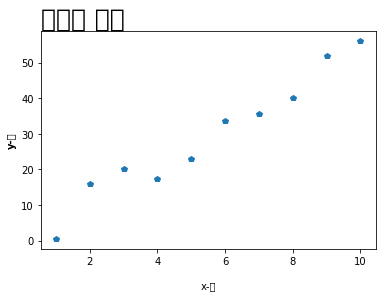

In [25]:
x = np.arange(1, 11)
y = x*5 + np.random.randn(10)*5

plt.plot(x, y, "p") # 산점도
plt.title("산점도 제목", fontdict = {'fontsize' : 25, 'fontweight' : "bold"}, loc = "left")
plt.xlabel("x-축", labelpad = 15)
plt.ylabel("y-축", fontdict = {'fontsize' : 10, 'fontweight' : "bold"})
plt.show()

-메소드 (범례) p.341
    - legend()

-옵션
    - labels : 범례로 삽입할 제목을 순서대로 리스트로 입력
    - loc : 범례 출력위치
        - 'best' : 0, 'upper right' : 1, 'upper left' : 2,
          'lower left' : 3, 'lower right' : 4, 'right' : 5,
          'center left' : 6, 'center right' : 7,
          'lower center' : 8, 'upper center' : 9, 'center' : 10

C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\ma

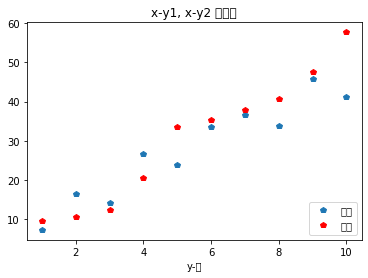

In [27]:
x = np.arange(1, 11)
y1 = x*5 + np.random.randn(10)*5
y2 = 5 + x*5 + np.random.randn(10)*5

plt.plot(x, y1, "p") # 산점도
plt.plot(x, y2, "rp") # 산점도
plt.title("x-y1, x-y2 산점도")
plt.xlabel("x-축")
plt.xlabel("y-축")
plt.legend(["남자", "여자"], loc = 'lower right')
plt.show()

-메소드
    - 축크기
    - axis() : x-축, y-축의 최소와 최대 범위
    - 보조 눈금선
    - plt.minorticks_on() : 그래프에 보조 눈금선 표시
    - 격자
    - grid() : 그래프에 주 눈금선과 보조 눈금선의 격자 표시

-옵션
    - b = False
    - which : 주 눈금선과 보조 눈금선의 격자 (기본값 : 'major' / minor, both)
    - axis : 격자를 표시할 축 (기본값 : 'both' / x, y)

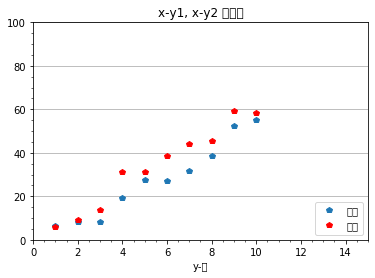

In [28]:
# size, family
x = np.arange(1, 11)
y1 = x*5 + np.random.randn(10)*5
y2 = 5 + x*5 + np.random.randn(10)*5

plt.plot(x, y1, "p") # 산점도
plt.plot(x, y2, "rp") # 산점도
plt.title("x-y1, x-y2 산점도")
plt.xlabel("x-축")
plt.xlabel("y-축")
plt.legend(["남자", "여자"], loc = 'lower right')
# 여기가 다른 부분 ( 축 범위 지정 )
plt.axis(xmin = 0, xmax = 15, ymin = 0, ymax = 100)
plt.minorticks_on() # 보조눈금선
plt.grid(b = True, which = 'major', axis = 'y') # 주, 보조 눈금선에 격자 표시
plt.show()

##### 막대그래프

-bar()
    - x : 범주
    - height : 막대의 높이
    - width : 막대의 넓이 (기본값 : 0.8)
    - color : 막대 채우기 색
    - edgecolor : 막대 외각선 색
          'b' : blue / 'g' : green / 'r' : red / 'c' : cyan
          'm' : megenta / 'y' : yellow / 'k' : black / 'w' : white

In [2]:
df = pd.read_csv("C:/Users/Affinity/Desktop/study/Module02/Python_Data/ch02_data/APTData.csv", header = 0,
                skiprows = 7, index_col = None, encoding = "utf-8")
df.head(5)

,id,Area,UseDistrict,Option,FAR,Price
0,apt01,도심권,제2종 일반주거지역,풀옵션형,132.72,515.051949
1,apt02,도심권,제2종 일반주거지역,풀옵션형,184.99,499.500499
2,apt03,도심권,상업지역,기본형,308.81,364.319535
3,apt04,도심권,상업지역,풀옵션형,493.08,410.945530
4,apt05,도심권,준주거지역,기본형,349.65,616.975986


동북권    140
동남권     92
서북권     81
서남권     76
도심권     11
Name: Area, dtype: int64


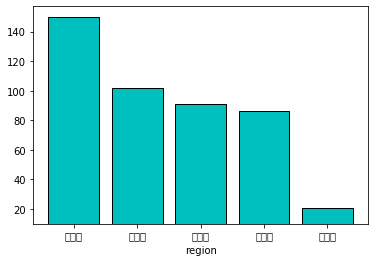

In [40]:
AreaTbl = pd.value_counts(df["Area"])
print(AreaTbl)
# 막대도표
# counts 값을 넣고 싶을 때에는 df.index로 입력
plt.bar(AreaTbl.index, AreaTbl, bottom = 10, color = "c", edgecolor = "k") # 산점도
plt.xlabel("region")
plt.show()

##### 원그래프

-pie()
    - x : 원조각의 값
    - explode : 특정 조각 빼기 (기본값 : None)
    - labels : 각 조각별 이름 (기본값 : None)
    - colors : 각 조각의 색 (기본값 : None)
        - 색깔의 약자나 이름 쓰면 됨
    - autopct : 퍼센트 표기 (기본값 : None)
        - "format%pct" 형식으로 입력
    - shadow : 그림자 효과로 입체감 주기 (기본값 : None)

동북권    140
동남권     92
서북권     81
서남권     76
도심권     11
Name: Area, dtype: int64


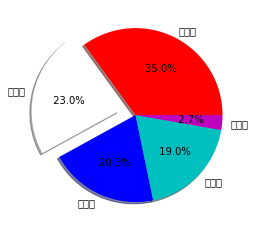

In [46]:
# 위에 막대도표꺼 데이터 불러오기
print(AreaTbl)
# 원도포
plt.pie(AreaTbl, explode = (0, 0.2, 0, 0, 0), labels = AreaTbl.index,
       colors = ["r", "w", "b", "c", "m"], autopct = "%5.1f%%", shadow = True)
# autopct는 정규식으로 표현. 소수 첫째 자리까지 pct로 나타낸다는 뜻.
plt.show()

##### 상자그래프 (boxplot)

-boxplot()
    - x : 상자 그래프를 작성할 데이터
    - notch : 중앙값의 신뢰구간 (기본값 : None)
    - vert : 수직방향의 그래프 (기본값 : None)
    - whis : 안쪽 울타리 값 (기본값 : 1.5)
    - labels : 항목의 이름을 리스트로 입력 (기본값 : None)

C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\ma

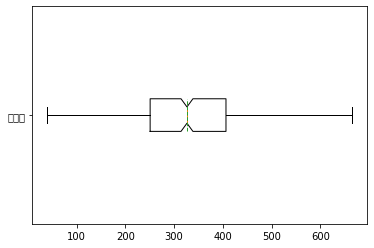

In [3]:
# 상자도표
plt.boxplot(df.Price, notch = True, vert = False, meanline = True, whis = 3, showmeans = True,
           labels = ['임대가'])
plt.show()

C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\mypython\lib\site-package

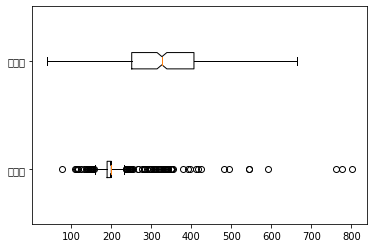

In [4]:
plt.boxplot([df.FAR, df.Price], notch = True, vert = False, whis = 3,
           labels = ["용적률", "임대가"])
plt.show()

##### 히스토그램

-hist()
    - x : 히스토그램을 작성할 데이터
    - bins : 계급의 수 또는 계급의 구간 (기본값 : None)
    - range : x-축의 최소와 최대 설정 (기본값 : None)
    - density : y-축 값을 빈도 또는 밀도로 작성 여부 (기본값 : None)
    - cumulative : 누적값 도표 작성여부 (기본값 : None)

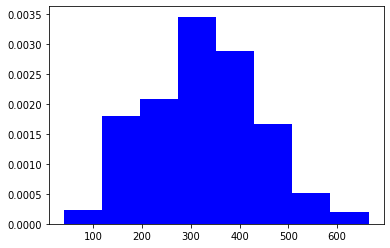

In [4]:
plt.hist(df.Price, bins = 8, color = "b", density = True)
plt.show()

##### 산점도

-plot()
    - x : 산점도 x-축 데이터
    - y : 산점도 y-축 데이터
    - color : 색
    - marker : 점 모양
    - linestyle : 선 모양
    - 색과 점모양, 선모양은 문자열로 형식으로 지정 가능
        - 'b' : blue markers with default shape
        - 'ro' : red circles
        - 'g-' : green solid line
        - '--' : dashed line with default color
        - 'k^:' : black triangle_up markers connected by a dotted line
    - 점모양, 선모양 p.349 도표 참조